# ML Introduction

In [223]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
fish_dataset = pd.read_csv("https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S24/main/regression/data/Fish.csv")

### Data Preparation

Clean the dataset if necessary before analysis. 

In [225]:
fish_dataset = fish_dataset.dropna()
fish_dataset = fish_dataset.drop_duplicates()
fish_dataset['Species'] = LabelEncoder().fit_transform(fish_dataset['Species'])

fish_dataset

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


### Task 1

1. Split the dataset randomly into training (70%) and testing (30%) sets.

In [226]:
X = fish_dataset.drop(columns=['Weight'])
y = fish_dataset['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

2. Apply the following models:

   - Linear Regression 

   - Random Forest 

In [227]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [228]:
random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

3. Calculate RMSE (Root Mean Squared Error) and 𝑅2 (Coefficient of Determination) on the test set. 

In [229]:
y_pred_linear_regression = linear_regression.predict(X_test)
rmse_linear_regression = root_mean_squared_error(y_test, y_pred_linear_regression)
r2_linear_regression = r2_score(y_test, y_pred_linear_regression)
print(f'Lineare Regression - RMSE: {rmse_linear_regression}, R2: {r2_linear_regression}')

y_pred_random_forest = random_forest.predict(X_test)
rmse_random_forest = root_mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)
print(f'Random Forest - RMSE: {rmse_random_forest}, R2: {r2_random_forest}')

Lineare Regression - RMSE: 123.10632536573186, R2: 0.8717736190375854
Random Forest - RMSE: 62.85337576074043, R2: 0.9665748115370872


4. Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models.

Linear Regression

Text(0.5, 1.0, 'Linear Regression')

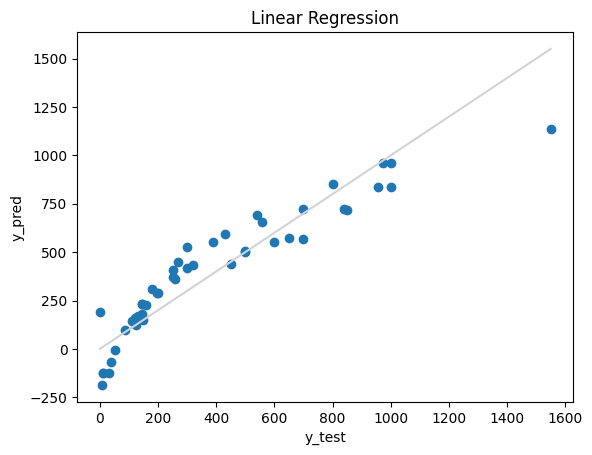

In [230]:
plt.scatter(y_test, y_pred_linear_regression)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='lightgrey')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Linear Regression')

Random Forest

Text(0.5, 1.0, 'Random Forest')

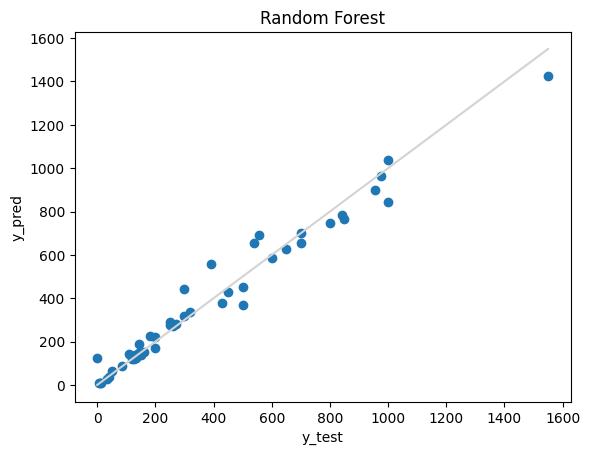

In [231]:
plt.scatter(y_test, y_pred_random_forest)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='lightgrey')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Random Forest')

Anhand der diagonalen Linien, welche die perfekte Vorhersage visualisiert, kann man erkennen, dass das Random Forest Modell deutlich besser abschneidet als das Linear Regression Modell. Beim Linear Regression Modell sind die Punkte weiter von dieser diagonalen Linie entfernt gestreut, während die Punkte im Random Forest Modell sich eher näher an der Diagonalen verteilen.

5. Provide your opinion on which metric, RMSE or $R^2$, is more appropriate in this case.

In diesem Fall wäre RSME eine bessere Metrik, da man anhand des Wertes deutlich erkennen kann, wie sehr die Vorhersage von den echten Werten abweicht, was auch die Visualisierung unterstreicht. Im Falle des Linear Regression Modells beträgt der RSME nämlich etwa 123, das heißt die Fehler bzw. Abweichungen in dem Modell sind recht groß. Dies ist auch gut im entsprechenden Diagramm erkennbar. Der RSME vom Random Forest Modell dagegen beträgt nur etwa 62, also nur ca. die Hälfte vom Linear Regression Modell. Die Abweichung ist also geringer, was ebenfalls die Darstellung des Diagramms bestätigt. Mit RSME kann also die Genauigkeit des Modells untersucht bzw. bestimmt werden.

Mit $R^2$ lässt sich dagegen eher interpretieren, wie gut die Modelle mit Werten umgehen können, die eine gewisse Varianz aufweisen, das heißt, wie gut ein Modell auch Werte richtig zuordnen kann, die eigentlich nicht den Standardwerten entsprechen. Es ist also auch gut zu wissen, was der Wert dieser Metrik bei den Modellen ist, allerdings ist es hier wichtiger zu wissen, wie genau die Modelle insgesamt sind, als wie gut Abweichungen richtig zugeordnet werden.

### Task 2

1. Change the training-test split to ensure that each species has 70% of its samples in the training set and 30% in the test set.

In [232]:
X_train_species, X_test_species, y_train_species, y_test_species = train_test_split(X, y, test_size=0.3, stratify=fish_dataset['Species'], random_state=1)

2. Repeat steps 2, 3, 4, from Task 1.

Linear Regression

Lineare Regression - RMSE: 112.17580673526406, R2: 0.8925003660923619


Text(0.5, 1.0, 'Linear Regression')

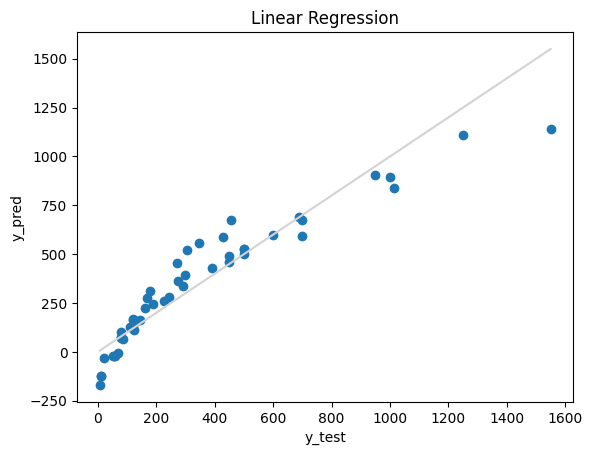

In [233]:
linear_regression_species = LinearRegression()
linear_regression_species.fit(X_train_species, y_train_species)

y_pred_linear_regression_species = linear_regression_species.predict(X_test_species)
rmse_linear_regression_species = root_mean_squared_error(y_test_species, y_pred_linear_regression_species)
r2_linear_regression_species = r2_score(y_test_species, y_pred_linear_regression_species)
print(f'Lineare Regression - RMSE: {rmse_linear_regression_species}, R2: {r2_linear_regression_species}')

plt.scatter(y_test_species, y_pred_linear_regression_species)
plt.plot([y_test_species.min(), y_test_species.max()], [y_test_species.min(), y_test_species.max()], color='lightgrey')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Linear Regression')

Random Forest

Random Forest - RMSE: 38.82861748547498, R2: 0.9871201015991942


Text(0.5, 1.0, 'Random Forest')

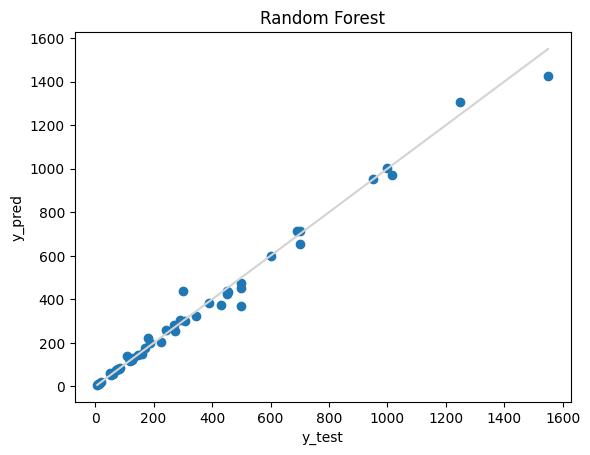

In [234]:
random_forest_species = RandomForestRegressor(random_state=1)
random_forest_species.fit(X_train_species, y_train_species)

y_pred_random_forest_species = random_forest.predict(X_test_species)
rmse_random_forest_species = root_mean_squared_error(y_test_species, y_pred_random_forest_species)
r2_random_forest_species = r2_score(y_test_species, y_pred_random_forest_species)
print(f'Random Forest - RMSE: {rmse_random_forest_species}, R2: {r2_random_forest_species}')

plt.scatter(y_test_species, y_pred_random_forest_species)
plt.plot([y_test_species.min(), y_test_species.max()], [y_test_species.min(), y_test_species.max()], color='lightgrey')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Random Forest')

Auch hier zeigt sich, dass das Random Forest Modell deutlich besser abschneidet als das Linear Regression Modell. Mit der Aufteilung nach Spezien liegen die Punkte im Random Forest Modell auch fast komplett auf der Diagonalen, während die Punkte beim Linear Regression Modell weiterhin eher um die Diagonale verstreut liegen.

### Comparison

1. Compare the results obtained from Task 1 and Task 2.

Für das Random Forest Modell hat sich durch das Aufteilen nach der Spezies eine deutliche Verbesserung gezeigt. Der RSME hat sich fast halbiert, das heißt die Fehler bzw. Abweichungen der vorhergesagten Werten zu den echten Werten fallen deutlich geringer aus. Auch der $R^2$ Wert ist nahezu 1, was bedeutet, dass das Modell auch gut mit Abweichungen umgehen kann.

Beim Linear Regression Modell dagegen hat das Aufteilen der Test- und Trainigsdaten nach Spezies keine signifikanten Verbesserungen gebracht. Sowohl RSME als auch $R^2$ haben sich nur minimal verbessert (RSME um 20, $R^2$ um 0,02) und auch anhand der Grafik kann man erkennen, dass sich die Verteilung um die Diagonale kaum verändert hat.

### Extra Point

1. point out which parameters can be adjusted in this exercise to improve model performance. (dont need to run analysis again) 

Für das Random Forest Modell hätten noch Hyperparameter wie Anzahl der Bäume (n_estimators) oder Tiefe der Bäume (max_depth) angegeben werden können.